In [31]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
# import warings
import warnings
warnings.filterwarnings("ignore")


# Dataset of car_crashes

In [37]:
df = sns.load_dataset('car_crashes')
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [45]:
# quantile transform
qt = QuantileTransformer(output_distribution = 'uniform')
df['total'] = qt.fit_transform(df[['total']])
df['speeding'] = qt.fit_transform(df[['speeding']])

# split data x and y
x = df.drop('speeding', axis = 1)
y = df['speeding']

In [46]:
# split data train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 42)

In [51]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,0.772193,1.080319,5.640,18.048,15.040,784.55,145.08,AL
1,0.524401,1.174987,4.525,16.290,17.014,1053.48,133.93,AK
2,0.706303,0.706303,5.208,15.624,17.856,899.47,110.35,AZ
3,1.554774,-0.467699,5.824,21.056,21.280,827.34,142.39,AR
4,-0.915365,-0.201893,3.360,10.920,10.680,878.41,165.63,CA


In [52]:
# convert the abbre column to numeric
df['abbrev'] = pd.factorize(df['abbrev'])[0]
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,0.772193,1.080319,5.640,18.048,15.040,784.55,145.08,0
1,0.524401,1.174987,4.525,16.290,17.014,1053.48,133.93,1
2,0.706303,0.706303,5.208,15.624,17.856,899.47,110.35,2
3,1.554774,-0.467699,5.824,21.056,21.280,827.34,142.39,3
4,-0.915365,-0.201893,3.360,10.920,10.680,878.41,165.63,4


In [60]:
df = sns.load_dataset('car_crashes')
df_1 = df[['total', 'speeding']]
# quantile transform
qt = QuantileTransformer(output_distribution = 'normal')
df_1['total'] = qt.fit_transform(df[['total']])
df['speeding'] = qt.fit_transform(df[['speeding']])

# split data x and y
x = df_1.drop('speeding', axis = 1)
y = df_1['speeding']


# split data train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 42)


# Fit the LinearRegression model with encoded variables
model = LinearRegression()
model.fit(x_train, y_train)
# predict
y_pred = model.predict(x_test)

# evaluation
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))




MSE:  3.4869181069041786
MAE:  1.587076034358011
R2:  0.22558991362047598
RMSE:  1.8673291372717822


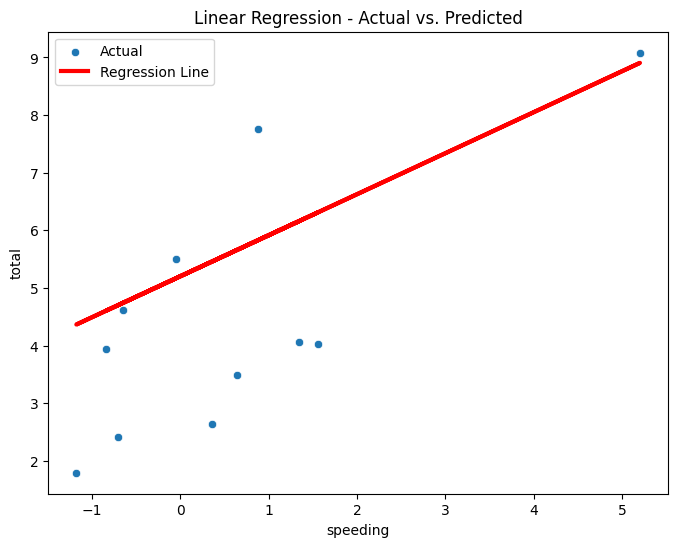

In [61]:
# Plotting the regression line
plt.figure(figsize=(8, 6))

# Scatter plot of the data points
sns.scatterplot(x=x_test['total'], y=y_test, label='Actual')

# Regression line
plt.plot(x_test, y_pred, color='red', linewidth=3, label='Regression Line')

plt.title('Linear Regression - Actual vs. Predicted')
plt.xlabel('speeding')
plt.ylabel('total')
plt.legend()
plt.show()